<a href="https://colab.research.google.com/github/777tharun7/Supervised-Learning/blob/main/LAB_11_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB-11

In [ ]:
# Prepare a model for predictioon of prostate cancer using KNN Classifier

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('prostate.csv')
df

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1.321756,7,60,4.385147,1
93,3.821004,3.896909,44,-1.386294,2.169054,7,40,4.684443,1
94,2.907447,3.396185,52,-1.386294,2.463853,7,10,5.143124,1
95,2.882564,3.773910,68,1.558145,1.558145,7,80,5.477509,1


In [ ]:
df.shape

(97, 9)

In [ ]:
x = df.drop("Target", axis=1)
y = df["Target"]

In [ ]:
scaler = StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(x), columns = df.columns[:-1])
df.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[18  4]
 [ 6  2]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.33      0.25      0.29         8

    accuracy                           0.67        30
   macro avg       0.54      0.53      0.53        30
weighted avg       0.64      0.67      0.65        30



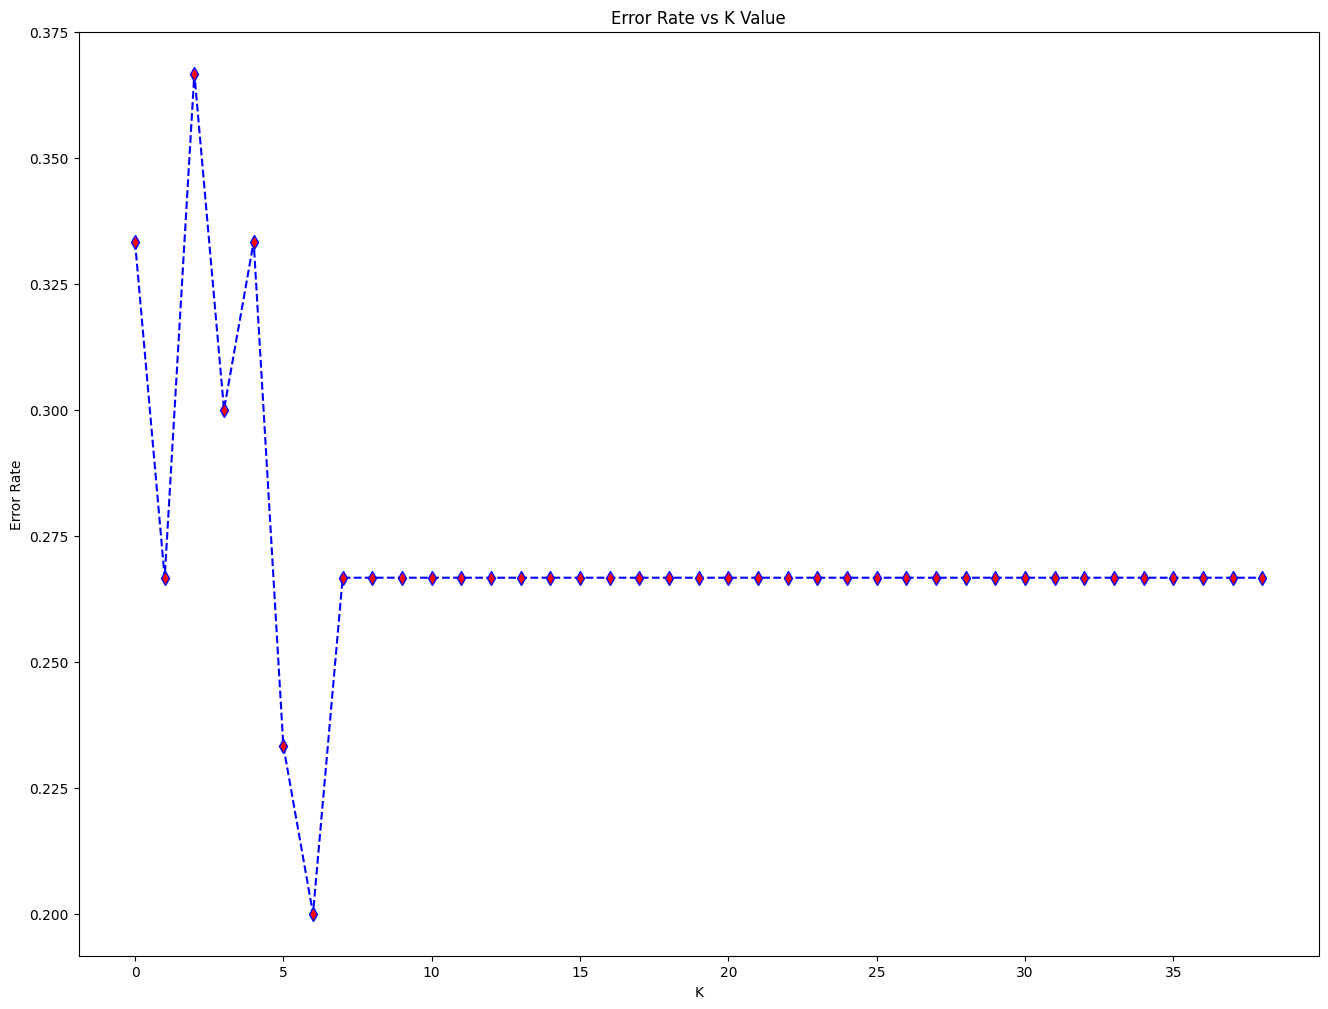

In [ ]:
# Elbow method for calculating K

error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  new_y_pred = knn.predict(x_test)
  error_rate.append(np.mean(new_y_pred != y_test))

plt.figure(figsize = (16, 12))
plt.plot(error_rate, color = 'Blue', linestyle = 'dashed', marker = 'd', markerfacecolor = 'red', markersize = 7)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()